<a href="https://colab.research.google.com/github/leungadh/coding/blob/master/A1_pet_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FastAi program 1
> My first fast AI program about dog and cat classification

- toc: false
- branch: master
- badges: true
- comments: true
- categories: [vision, pets, classification]

In [1]:
#Install Fastai in colab
!pip install -Uqq fastbook

     |████████████████████████████████| 720 kB 5.7 MB/s 
     |████████████████████████████████| 1.2 MB 38.3 MB/s 
     |████████████████████████████████| 49 kB 5.3 MB/s 
     |████████████████████████████████| 187 kB 45.3 MB/s 
     |████████████████████████████████| 56 kB 4.1 MB/s 
     |████████████████████████████████| 51 kB 299 kB/s 
     |████████████████████████████████| 561 kB 44.0 MB/s 
     |████████████████████████████████| 130 kB 45.2 MB/s 


In [2]:
#import the necessary libraries
import fastbook
from fastbook import *
from fastai.vision.all import *

Download Image of Pets and Dogs

In [4]:
path = untar_data(URLs.PETS)/'images'

Define the Y-value of samples from file name.

In [5]:
def is_cat(x): return x[0].isupper()

Use the class ImageDataLoader to separate Dogs and Cats

In [6]:
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

Then we can start the training.

In [7]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(10)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.176983,0.025701,0.008119,01:40


epoch,train_loss,valid_loss,error_rate,time
0,0.044774,0.015274,0.005413,02:17
1,0.051577,0.028491,0.008796,02:17
2,0.028409,0.022383,0.006766,02:17
3,0.023938,0.019018,0.006766,02:17
4,0.023373,0.012015,0.006089,02:17
5,0.011624,0.011480,0.003383,02:17
6,0.007147,0.010880,0.002706,02:17
7,0.003290,0.005658,0.003383,02:17
8,0.001731,0.006262,0.002706,02:18
9,0.001556,0.006831,0.003383,02:17


In [8]:
path.ls()

(#7393) [Path('/root/.fastai/data/oxford-iiit-pet/images/japanese_chin_39.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/pug_57.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/english_cocker_spaniel_176.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/basset_hound_32.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/newfoundland_170.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/samoyed_16.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/pug_155.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Birman_92.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/german_shorthaired_197.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Sphynx_153.jpg')...]

In [9]:
btn_upload = widgets.FileUpload()

In [10]:
btn_upload

FileUpload(value={}, description='Upload')

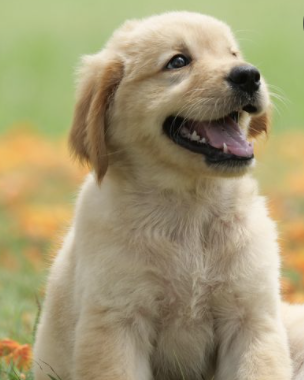

In [13]:
img = PILImage.create(btn_upload.data[0])
img

In [14]:
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: False.
Probability it's a cat: 0.000047
